In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
"""
We will implement linear regression with one variable to predict profits for a food truck. 
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening
a new outlet. The chain already has trucks in various cities and you have data for profits and 
populations from the cities.You would like to use this data to help you select which city to 
expand to next. 
The file ex1data1.txt contains the dataset for our linear regression problem. The first column 
is the population of a city and the second column is the profit of a food truck in that city. A
negative value for profit indicates a loss. 


the dataset is loaded from the data file into the variables X and y:
"""
#loading data
data=np.loadtxt('ex1data1.txt', delimiter=',')
x=data[:,0]
y=np.c_[data[:,1]]

#adding a column of biases to the x matrix and initialzing other variables
X=np.c_[np.ones(data.shape[0]),x]

m=X.shape[0]#m is the number of training examples in the data
n=X.shape[1]#n is the number of features in the data

iter=1500#initializing number of iterations to achieve gradient descent
alpha=0.01#initializing learning rate for gradient descent

#initializing the weights to zero
theta=np.zeros((n,y.shape[1]))#2x1


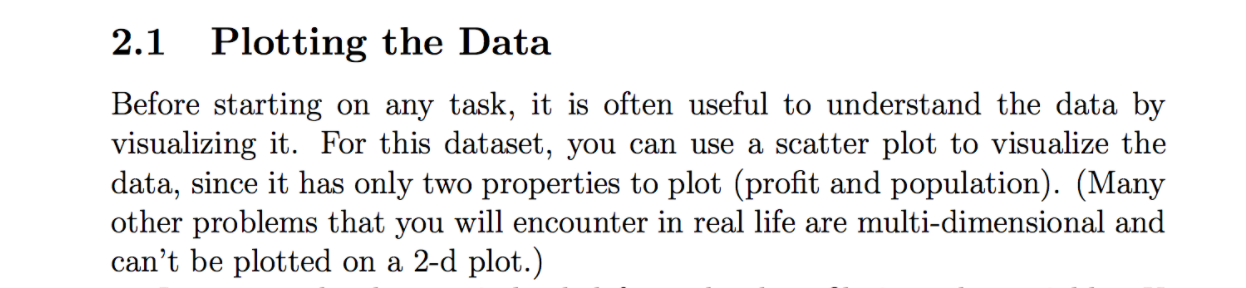

In [3]:
from IPython.display import Image
Image(filename='1.jpg')

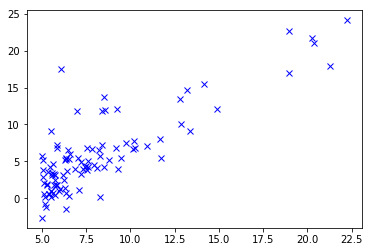

In [4]:
#plotting the given 2D data for easy visualization of the regression problem
def visualize_data(x,y):
    plt.plot(x,y,'bx')
    plt.show()
visualize_data(x,y)

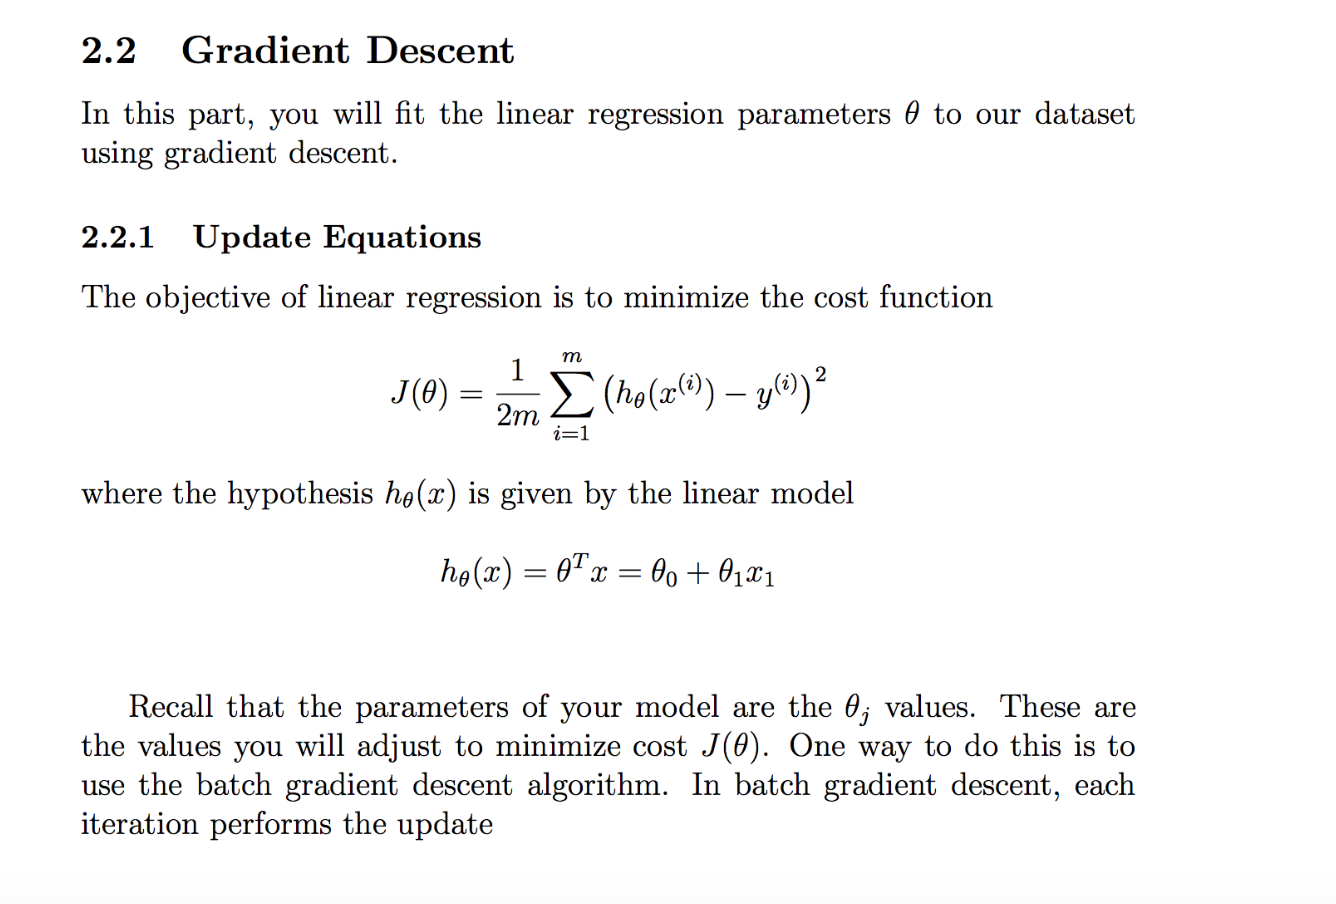

In [5]:
from IPython.display import Image
Image(filename='gd.jpg')

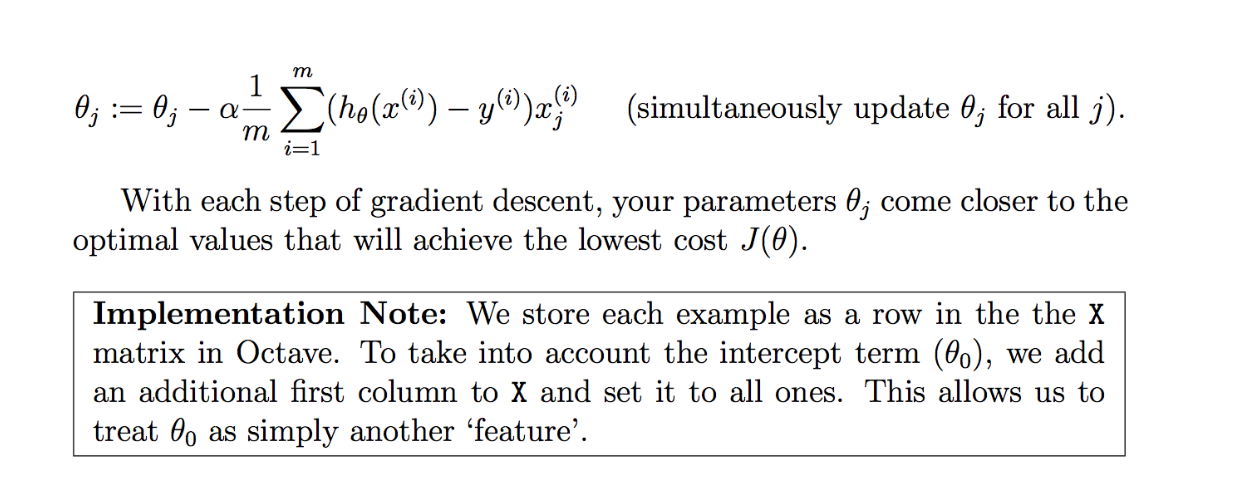

In [6]:
from IPython.display import Image
Image(filename='eq.jpg')

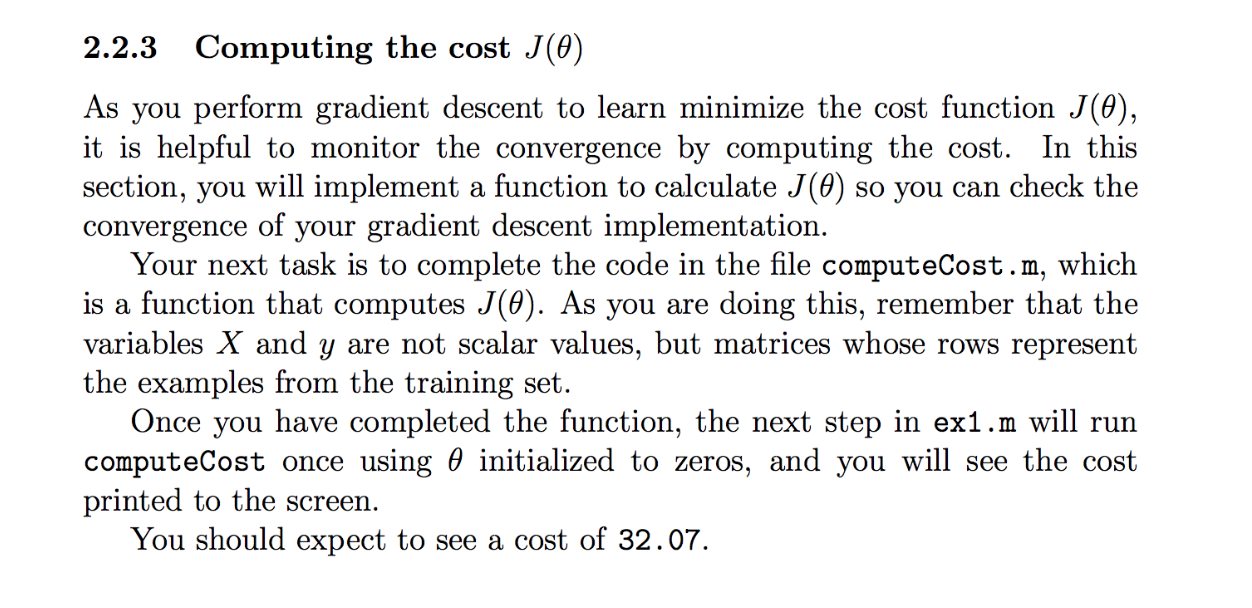

In [7]:
Image(filename='cost.jpg')

In [8]:
def get_cost(X,y,theta):
    """
    The function calculates the cost function to be minimized which is the square of the 
    difference between the actual output and the predicted output divided by the number
    of training exams times two. First, the weights are multiplied by X to find the predicted
    output. y is then subtracted from this predicted output. and the mean error and cost function
    is computed
    """
    #hyp represents the hypothesis which is calculated by multiplying the X and theta matrix
    hyp=X.dot(theta)
    err=hyp-y#the difference between y and the hyp is calculated
    sqr_err=err**2#the error is squared
    #the cost function is calculated as per the equation where the np.sum function is used to convert the matrix to a numerical value
    J=np.sum(sqr_err)/(2*m)
    return J


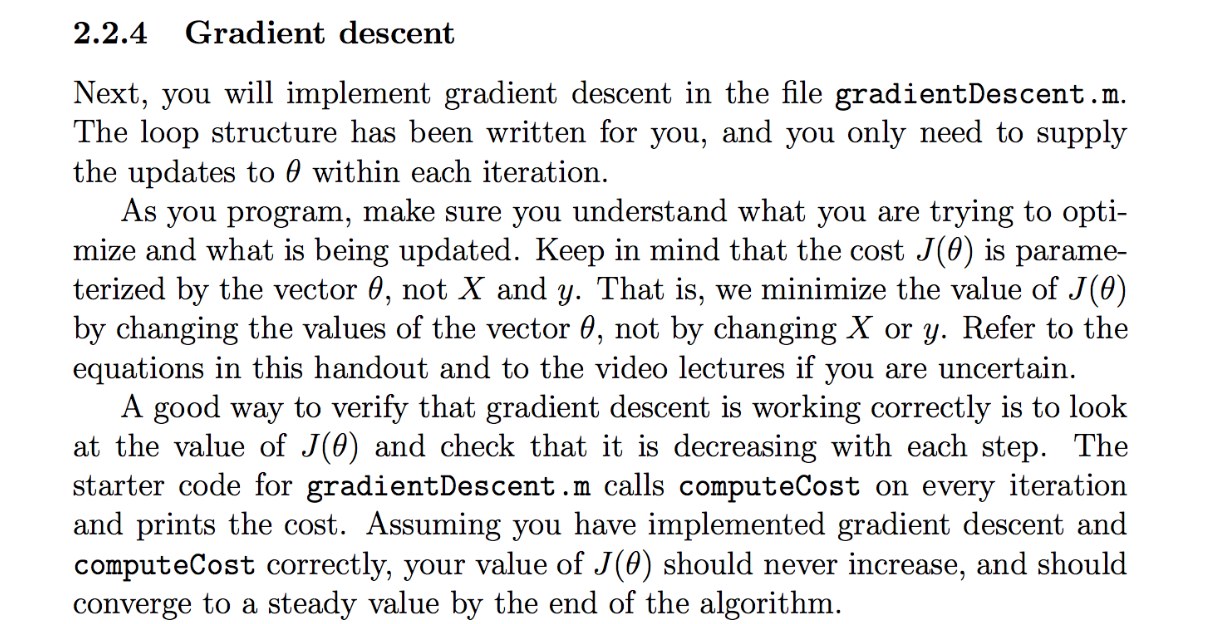

In [9]:
Image(filename='imp.jpg')

In [10]:
def gradient_descent(X,y,theta):
    """
    The function computes the gradient descent algorithm that is constantly updating the value of
    theta so that the cost function is minimized.
    """
    cost=[]
    for i in range(0,iter):
        hyp = X.dot(theta)#the predicted output for each iteration is calculate
        """
        the transpose of the X matrix is multiplied by the error matrix.As the product and the theta matrix now have the
        same dimensions, they are subtracted and theta is cont
        """
        theta=theta-((alpha/m)*(X.T.dot(hyp-y)))
        J=get_cost(X,y,theta)
        cost.append(J)
    return theta,cost

In [11]:
def predict(weights,input):
    """
    The function predicts the output using weights obtained from gradient descent
    """
    X = np.c_[np.ones(1), input]# a row of biases is added to the the input
    return (X.dot(weights))# the weights computed using gradient descent are used to predict y

Visualize data...


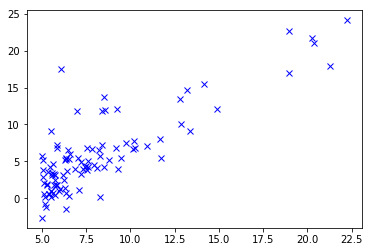

In [12]:
print("Visualize data...")
visualize_data(x,y)

In [13]:

print("The initial cost is:%f" %get_cost(X,y,theta))



The initial cost is:32.072734


In [14]:
print("\nTheta obtained after gradient descent")
weights=gradient_descent(X,y,theta)[0]
print(weights)


Theta obtained after gradient descent
[[-3.63029144]
 [ 1.16636235]]


Plotting line of best fit


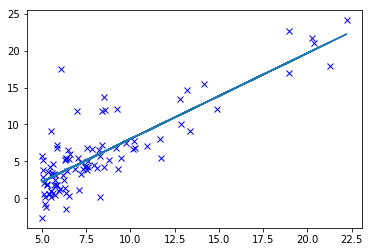

In [48]:
print("Plotting line of best fit")
plt.plot(x,y,'bx')
weights=y=np.c_[weights]
eqn=X.dot(weights)#calculating y with weigths obtained from gradient descent
plt.plot(x,eqn,'-')
plt.show()

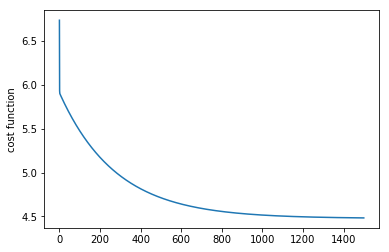

In [23]:
"""
To visualize the gradient descent algorithm we can plot the cost function computed after every 
iteration and we observe a grpah where as the number of iterations increase, the cost function
saturates

"""
cost=gradient_descent(X,y,theta)[1]
plt.plot(cost,"-")
plt.ylabel('cost function')
plt.show()

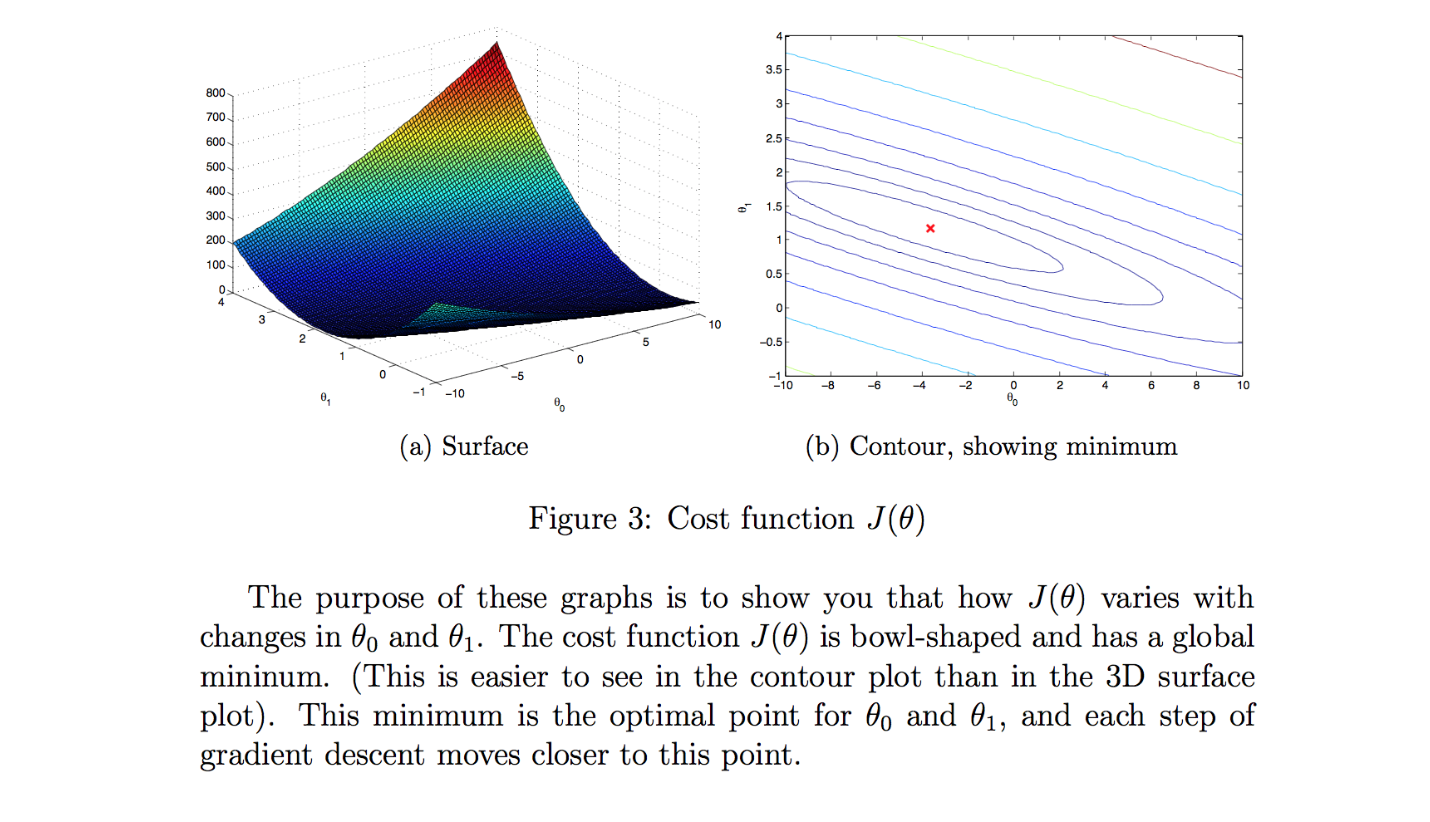

In [27]:
Image(filename='ab.jpg')

In [16]:
print("For a population of 35000, we predict a profit of %f" %(predict(weights,3.5)*10000))

For a population of 35000, we predict a profit of 4519.767868


In [28]:
"""
In this part of the exercise , you will implement linear regression with
multiple variables to predict the prices of houses. Suppose you are selling 
your house and you want to know what a good market price would be. One way
to do this is to collect information on recent houses sold and make a model 
of housing prices.
The file ex1data2.txt contains a training set of housing prices in Portland
Oregon. The first column is the size of the house(in square feet), the second
column is the number of bedrooms and the third column is the price of the house.
"""

data=np.loadtxt('ex1data2.txt', delimiter=',')
x=data[:,0:2]
y=np.c_[data[:,1]]

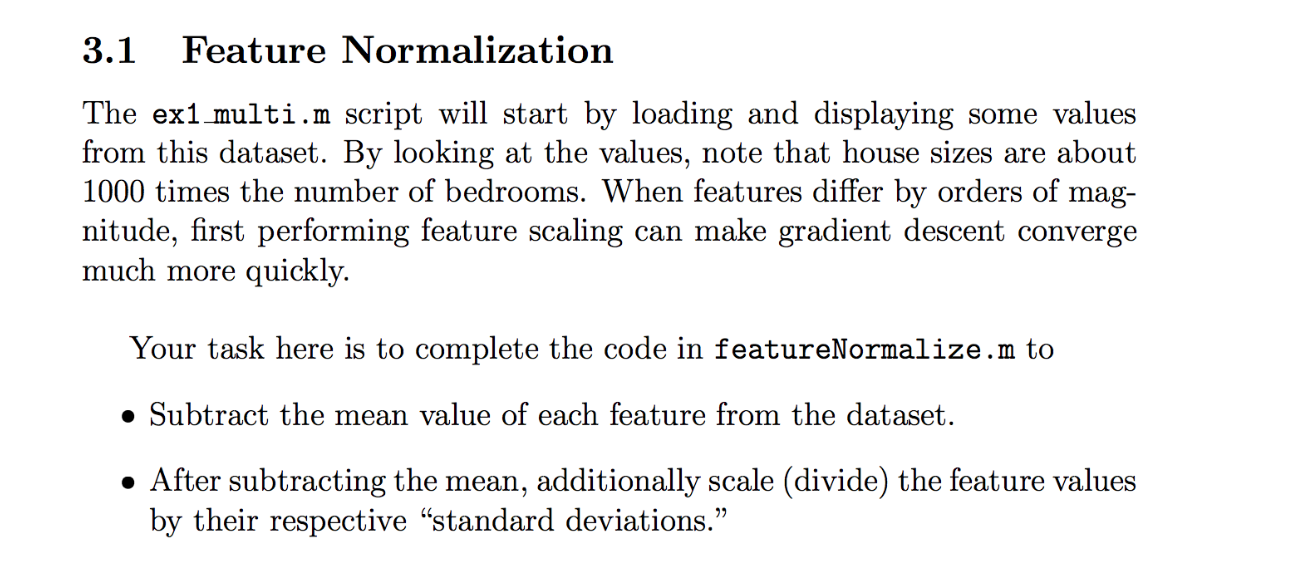

In [29]:
Image(filename='fn.jpg')

In [30]:
m=np.mean(x,axis=0)
print("Before normalization, x is:")
print(x)

std=np.std(x,axis=0)
for i in range(x.shape[0]):
    x[i,:]=(x[i,:]-m)/std;
print("After normalization, x is:")
print(x)

Before normalization, x is:
[[  2.10400000e+03   3.00000000e+00]
 [  1.60000000e+03   3.00000000e+00]
 [  2.40000000e+03   3.00000000e+00]
 [  1.41600000e+03   2.00000000e+00]
 [  3.00000000e+03   4.00000000e+00]
 [  1.98500000e+03   4.00000000e+00]
 [  1.53400000e+03   3.00000000e+00]
 [  1.42700000e+03   3.00000000e+00]
 [  1.38000000e+03   3.00000000e+00]
 [  1.49400000e+03   3.00000000e+00]
 [  1.94000000e+03   4.00000000e+00]
 [  2.00000000e+03   3.00000000e+00]
 [  1.89000000e+03   3.00000000e+00]
 [  4.47800000e+03   5.00000000e+00]
 [  1.26800000e+03   3.00000000e+00]
 [  2.30000000e+03   4.00000000e+00]
 [  1.32000000e+03   2.00000000e+00]
 [  1.23600000e+03   3.00000000e+00]
 [  2.60900000e+03   4.00000000e+00]
 [  3.03100000e+03   4.00000000e+00]
 [  1.76700000e+03   3.00000000e+00]
 [  1.88800000e+03   2.00000000e+00]
 [  1.60400000e+03   3.00000000e+00]
 [  1.96200000e+03   4.00000000e+00]
 [  3.89000000e+03   3.00000000e+00]
 [  1.10000000e+03   3.00000000e+00]
 [  1.4580

In [ ]:
"""
Now that our x vector is normalized, cost function and gradient descent
can be computed using the same above functions
"""